<a href="https://colab.research.google.com/github/cku7808/NLP-practice/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word2Vec**

# 선행 개념

**인코딩**  
딥러닝 모델은 텍스트를 입력으로 받을 수 없음, 숫자만 입력으로 받을 수 있음  
-> 인코딩이란 텍스트를 숫자로 변환하는 것  
  
a : "thank you"  
b : "love you"  

|unique word|encoding|
|:--:|:--:|
|thank|0|
|you|1|
|love|2|

**One-Hot Encoding**  
단어가 3개가 있으니 3차원 벡터로 각 단어들을 표현하자  

|unique word|encoding|
|:--:|:--:|  
|thank|[1,0,0]|
|you|[0,1,0]|
|love|[0,0,1]|  
  
그러나, One-Hot 인코딩 방식으로 표현된 단어들은 유사도를 가질 수 없음

**임베딩**  
단어 벡터 간의 유사도를 구할 수 있음  
임베딩은 보통 One-Hot 인코딩에 비해 저차원의 벡터  
  
|unique word|encoding|embedding|
|:--:|:--:|:--:|  
|king|[1,0,0,0]|[1,2]|
|man|[0,1,0,0]|[1,3]|
|queen|[0,0,1,0]|[5,1]|  
|woman|[0,0,0,0]|[5,3]|  
  

# Word2Vec

워드투벡은 이러한 임베딩 중의 하나이며, 유사도는 이웃한 단어들로 부터 구할 수 있음  


**Skipgram**  


중심 단어에서 주변 단어를 예측하는 방법  
a : "king brave man"  
b : "queen beautiful woman"  
위와 같은 두 문장이 존재하고, window size가 1이라고 하면 다음과 같다  

|word|neighbor|
|:--:|:--:|
|king|brave|
|brave|king|
|brave|man|
|man|brave|
|queen|beautiful|
|beautiful|queen|
|beautiful|woman|
|woman|beautiful|  
  
위와 같이 모든 단어들의 이웃 단어들을 얻게 되었고, 모델의 입력값은 인코딩 값(one-hot)이 된다. 그리고 타겟값은 이웃 단어의 인코딩 값(one-hot)이 되어 중간의 hidden value로서 임베딩 값을 얻는 것이 목적이다.  
-> 즉 input과 target 인코딩 값을 통해 hidden layer의 가중치 w를 갱신시켜 나감  
-> w가 점차 유사도를 갖기 위한 값으로 바뀜  

![이미지](https://blog.kakaocdn.net/dn/LKTvQ/btqGgE38m8G/fGzPMpLefbrz4By0rvR4sK/img.png)  
출처 : 허민석님 딥러닝 자연어 처리 Word2Vec 강의
  
**그리고 최종적으로 결정된 w 값들이 바로 Word2Vec이다.**  
**임베딩 값 == w 값**

input  
$king = $  
$[$  
  $[1,0,0,0,0,0]$  
  $]$  

hidden layer  
$[[1,1],$  
$[1,2],$  
$[1,3],$  
$[5,5],$  
$[5,6],$  
$[5,7]]$  
이라고 할 때, input이 one-hot 인코딩이기 때문에,  
input $\times$ hidden layer 가 hidden layer와 동일하다 -> hidden layer가 look up table의 역할을 할 수 있음


In [ ]:
docs = [
    "king is a strong man",
    "queen is a wise woman",
    "boy is a young man",
    "girl is a young woman",
    "prince is a young king",
    "princess is a young queen",
    "man is strong",
    "woman is pretty",
    "prince is a boy will be king",
    "princess is a girl will be queen" 
]

In [ ]:
# 불용어 제거

# 불용어 지정
stop = ["is","a","will","be"]

result = [] #unique words
docs2 = [] # 불용어 제거한 문장들
for doc in docs:
  tmp = []
  for word in doc.split():
    if word not in stop:
      result.append(word)
      tmp.append(word)
  docs2.append(tmp)
result = set(result)

print(result)
print(docs2)

{'boy', 'young', 'pretty', 'woman', 'prince', 'king', 'girl', 'princess', 'man', 'strong', 'queen', 'wise'}
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


In [21]:
# 이웃 단어 찾기

# input값 one-hot encoding을 위한 정수 인덱스 부여
oneHot = {}
for idx, word in enumerate(result):
  oneHot[word] = idx

window_size = 2
with_neighbors = []
for doc in docs2:
  for i in range(len(doc)):
    me = doc[i]
    for j in doc[max(i-window_size,0):min(i+window_size+1,len(doc))]:
      if j != me:
        with_neighbors.append([me,j])
print(with_neighbors)


[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman'], ['wise', 'queen'], ['wise', 'woman'], ['woman', 'queen'], ['woman', 'wise'], ['boy', 'young'], ['boy', 'man'], ['young', 'boy'], ['young', 'man'], ['man', 'boy'], ['man', 'young'], ['girl', 'young'], ['girl', 'woman'], ['young', 'girl'], ['young', 'woman'], ['woman', 'girl'], ['woman', 'young'], ['prince', 'young'], ['prince', 'king'], ['young', 'prince'], ['young', 'king'], ['king', 'prince'], ['king', 'young'], ['princess', 'young'], ['princess', 'queen'], ['young', 'princess'], ['young', 'queen'], ['queen', 'princess'], ['queen', 'young'], ['man', 'strong'], ['strong', 'man'], ['woman', 'pretty'], ['pretty', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'prince'], ['boy', 'king'], ['king', 'prince'], ['king', 'boy'], ['princess', 'girl'], ['princess', 'queen'], ['girl', 'princess'], ['girl', 'queen'], ['queen', 'princess']

In [23]:
import pandas as pd
data = pd.DataFrame(with_neighbors, columns=["input","label"])
data.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [25]:
data.shape

(52, 2)

In [26]:
oneHot

{'boy': 0,
 'young': 1,
 'pretty': 2,
 'woman': 3,
 'prince': 4,
 'king': 5,
 'girl': 6,
 'princess': 7,
 'man': 8,
 'strong': 9,
 'queen': 10,
 'wise': 11}

In [29]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
# 단어의 개수가 12개 이므로 12차원의 one_hot 벡터 생성
one_hot_dim = len(result)

# one-hot encoding
def one_hot_encoding(idx):
  encoding_result = np.zeros(one_hot_dim)
  encoding_result[idx] = 1
  return encoding_result

X = [] #input
Y = [] #target

for x,y in zip(data["input"],data["label"]):
  X.append(one_hot_encoding(oneHot[x]))
  Y.append(one_hot_encoding(oneHot[y]))

# 넘파이 array로 변환
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# placeholder : 현재 값을 지정하지 않고 나중에 값을 던져줄 수 있도록 공간을 배정해놓는 것
x = tf.placeholder(tf.float32, shape=(None, one_hot_dim))
y_label = tf.placeholder(tf.float32, shape=(None, one_hot_dim))

# 워드 임베딩 차원은 2차원으로 지정한다
embedding_dim = 2

# hidden layer : 가중치w와 바이어스 b를 지정
# 활성화 함수(activation function)를 사용하지 않음 -> linear
W1 = tf.Variable(tf.random_normal([one_hot_dim, embedding_dim]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x,W1),b1)

# output layer
# 소프트맥스 함수로 probability 도출
W2 = tf.Variable(tf.random_normal([embedding_dim, one_hot_dim]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2),b2))

# 손실 함수(loss function) : 크로스 엔트로피
# 크로스 엔트로피 : 실제 데이터의 확률 분포와 학습된 모델이 계산한 확률 분포의 차이를 구한다
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# 학습률:0.05, 손실을 최소화 하도록 학습
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [32]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
  sess.run(train_op, feed_dict={x : X_train, y_label:Y_train})
  if i%3000 == 0:
    print("iteration "+str(i)+"loss is :", sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0loss is : 3.7180035
iteration 3000loss is : 1.812454
iteration 6000loss is : 1.761132
iteration 9000loss is : 1.7369404
iteration 12000loss is : 1.7234099
iteration 15000loss is : 1.7144955
iteration 18000loss is : 1.7078525


In [33]:
# 가중치와 바이어스가 충분히 갱신되었을 것
vectors = sess.run(W1+b1)
print(vectors)

[[ 0.32125276  1.255711  ]
 [ 0.06785035  0.16553295]
 [ 3.2441602  -3.593597  ]
 [ 0.20981157 -0.36256218]
 [ 2.7693837   5.511735  ]
 [ 0.3868152   1.0575653 ]
 [ 1.7605479  -0.5894613 ]
 [ 5.1377263  -0.17910182]
 [ 2.568724    4.521522  ]
 [ 0.270666    4.2522397 ]
 [ 0.69688684 -0.52708304]
 [ 4.733299   -2.3242402 ]]


In [36]:
w2v_df = pd.DataFrame(vectors, columns=["x1","x2"])
w2v_df["word"] = list(result)
w2v_df = w2v_df[["word","x1","x2"]]
w2v_df

,word,x1,x2
0,boy,0.321253,1.255711
1,young,0.067850,0.165533
2,pretty,3.244160,-3.593597
3,woman,0.209812,-0.362562
4,prince,2.769384,5.511735
5,king,0.386815,1.057565
6,girl,1.760548,-0.589461
7,princess,5.137726,-0.179102
8,man,2.568724,4.521522
9,strong,0.270666,4.252240


차트로 확인하기

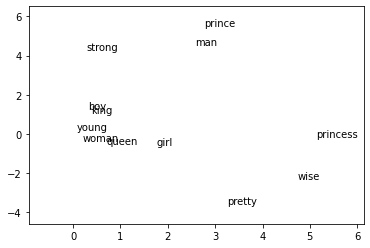

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df["word"], w2v_df["x1"], w2v_df["x2"]):
  ax.annotate(word, (x1,x2))
padding = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - padding
y_axis_min = np.amin(vectors, axis=0)[1] - padding
x_axis_max = np.amax(vectors, axis=0)[0] + padding
y_axis_max = np.amax(vectors, axis=0)[1] + padding

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()